# Example 2: Implementing GeMpy into PyMC3

### Generating data

In [1]:
# Importing and data
import theano.tensor as T
import theano
import sys, os
sys.path.append("../")

# Importing GeMpy modules
import gempy as GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

#%matplotlib inline
%matplotlib inline



# Setting the extent
geo_data = GeMpy.create_data([0,10,0,10,0,10], [50,50,50])


# =========================
# DATA GENERATION IN PYTHON
# =========================
# Layers coordinates
layer_1 = np.array([[0.5,4,7], [2,4,6.5], [4,4,7], [5,4,6]])#-np.array([5,5,4]))/8+0.5
layer_2 = np.array([[3,4,5], [6,4,4],[8,4,4], [7,4,3], [1,4,6]])
layers = np.asarray([layer_1,layer_2])

# Foliations coordinates
dip_pos_1 = np.array([7,4,7])#- np.array([5,5,4]))/8+0.5
dip_pos_2 = np.array([2.,4,4])

# Dips
dip_angle_1 = float(15)
dip_angle_2 = float(340)
dips_angles = np.asarray([dip_angle_1, dip_angle_2], dtype="float64")

# Azimuths
azimuths = np.asarray([90,90], dtype="float64")

# Polarity
polarity = np.asarray([1,1], dtype="float64")

# Setting foliations and interfaces values
GeMpy.set_interfaces(geo_data, pn.DataFrame(
    data = {"X" :np.append(layer_1[:, 0],layer_2[:,0]),
            "Y" :np.append(layer_1[:, 1],layer_2[:,1]),
            "Z" :np.append(layer_1[:, 2],layer_2[:,2]),
            "formation" : np.append(
               np.tile("Layer 1", len(layer_1)), 
               np.tile("Layer 2", len(layer_2))),
            "labels" : [r'${\bf{x}}_{\alpha \, 0}^1$',
               r'${\bf{x}}_{\alpha \, 1}^1$',
               r'${\bf{x}}_{\alpha \, 2}^1$',
               r'${\bf{x}}_{\alpha \, 3}^1$',
               r'${\bf{x}}_{\alpha \, 0}^2$',
               r'${\bf{x}}_{\alpha \, 1}^2$',
               r'${\bf{x}}_{\alpha \, 2}^2$',
               r'${\bf{x}}_{\alpha \, 3}^2$',
        
                        r'${\bf{x}}_{\alpha \, 4}^2$'] }))

GeMpy.set_foliations(geo_data,  pn.DataFrame(
    data = {"X" :np.append(dip_pos_1[0],dip_pos_2[0]),
            "Y" :np.append(dip_pos_1[ 1],dip_pos_2[1]),
            "Z" :np.append(dip_pos_1[ 2],dip_pos_2[2]),
            "azimuth" : azimuths,
            "dip" : dips_angles,
            "polarity" : polarity,
            "formation" : ["Layer 1", "Layer 2"],
            "labels" : [r'${\bf{x}}_{\beta \,{0}}$',
              r'${\bf{x}}_{\beta \,{1}}$'] })) 



layer_3 = np.array([[2,4,3], [8,4,2], [9,4,3]])
dip_pos_3 = np.array([1,4,1])
dip_angle_3 = float(80)
azimuth_3 = 90
polarity_3 = 1



GeMpy.set_interfaces(geo_data, pn.DataFrame(
    data = {"X" :layer_3[:, 0],
            "Y" :layer_3[:, 1],
            "Z" :layer_3[:, 2],
            "formation" : np.tile("Layer 3", len(layer_3)), 
            "labels" : [  r'${\bf{x}}_{\alpha \, 0}^3$',
                           r'${\bf{x}}_{\alpha \, 1}^3$',
                           r'${\bf{x}}_{\alpha \, 2}^3$'] }), append = True)
GeMpy.get_raw_data(geo_data,"interfaces")


GeMpy.set_foliations(geo_data, pn.DataFrame(data = {
                     "X" : dip_pos_3[0],
                     "Y" : dip_pos_3[1],
                     "Z" : dip_pos_3[2],
            
                     "azimuth" : azimuth_3,
                     "dip" : dip_angle_3,
                     "polarity" : polarity_3,
                     "formation" : [ 'Layer 3'],
                     "labels" : r'${\bf{x}}_{\beta \,{2}}$'}), append = True)


GeMpy.set_data_series(geo_data, {'younger': ('Layer 1', 'Layer 2'),
                      'older': 'Layer 3'}, order_series = ['younger', 'older'])




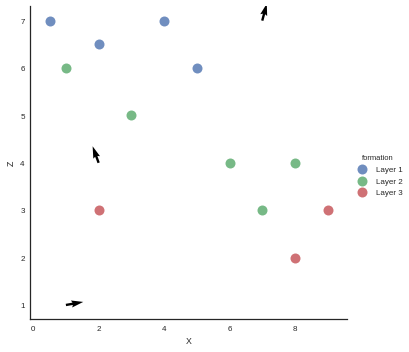

In [3]:
GeMpy.plot_data(geo_data, direction='y')

In [4]:
GeMpy.visualize(geo_data)

<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>
<class 'gempy.visualization_vtk.InterfaceSphere'>


In [5]:
# Select series to interpolate data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZkAAAFgCAYAAABpOAQfAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAHchJREFUeJzt3XtwVdXdxvEnnGuEJJCEBASD3ITSXFSkqVE0ErBTxaJTEaeoTBVbBRyLOqNAi/FVjOlY60il1VoZbP9RR1C8jEqCSDElwzByiW0iQoYAkoDhkgRzrpz3DydpQ0gM5Kyzz+X7mcmYbJZ7/ziHfZ6svddaOykUCoUEAIABA6wuAAAQvwgZAIAxhAwAwBhCBgBgjCUhEwgEdPDgQQUCASsODwCIEEtCprGxUSUlJWpsbLTi8AD66Pjx48rOzlZOTo7VpSBGcbkMQI+WLFmiI0eOyOv1Wl0KYhQhA+Cs/vWvf+mll16SJHk8HourQawiZAB0EwgEdN9993X+TE8G54uQAdDNCy+8oF27dnX+7PV6xeIgOB+EDIAuDhw4oOXLl3fb7vP5LKgGsY6QAdDFgw8+qFOnTnXbzn0ZnA9CBkCnd999V5988ommTJnS7c8IGZwPQgZAp6KiIh07dkyLFy/u3HbXXXdJ4uY/zo/d6gIARI+MjAxJ0oYNGyRJEyZM0Jo1a1RQUMA9GZyXmA+Zdm9AO/ccVcspn1IHOlUwfqiSXTH/10o4vI/RIxQKqaKiQpI0ffp0SdJDDz3E6DKcl5g+izdU71fFtgb5/MHObes2faXpU3I0o3CUhZXhXPA+Rpcvv/xSBw4ckCTNmDGjc3tSUpJVJSGGxWzIbKjerw+q6rtt9/mDndv5gIp+vI/Rp+NSmc1mU3FxsbXFIOYZCZl33nlHNTU1kqTNmzfro48+Cuv+270BVWxr6LVNxbYGTb10hNxccolavI/RqeNS2Y9+9COlpaVZXA1inZEzd9asWZo1a5bef/99XXbZZWHf/849R7tcWjkbnz+onXuOqjB3eNiPj/DgfYxOM2fOVCAQ0NSpU60uBXHA2K+HXq9XlZWVeu6558K+75ZTfRvl0td2sAbvY3SaP3++5s+fb3UZiBPG5slUVlYau56bOtAZ1nawBu8jEP+MhcyOHTs0adIkI/suGD9UToet1zZOh00F44caOT7Cg/cRiH/GQmbp0qUaN26ckX0nu+yaPqX3J/VNn5LDzeIox/sIxL+YPXs7hrWeOb/C6bAxvyKG8D4C8S1mQ0b67gNq6qUjus0U5zff2ML7CMSvmD+L3S47w1vjAO8jEJ9YhRkAYAwhAwAwhpABABhDyAAAjCFkAADGEDIAAGMIGQCAMYQMAMAYQgYAYAwhAwAwhpABABgT82uXxYN2b6Db4pDJLA4JIA7wSWaxDdX7uy1zv27TVyxzDyAuEDIW2lC9Xx9U1Xfb7vMHO7cTNABiGfdkLNLuDahiW0OvbSq2NcjjDUSoIgAIP0LGIjv3HO1yiexsfP6gdu45GqGKACD8CBmLtJzyhbUdAEQjQsYiqQOdYW0HANGIkLFIwfihcjpsvbZxOmwqGD80QhUBQPgRMhZJdtk1fUpOr22mT8mRm/kyAGIYn2AW6hiefOY8GafDxjwZAHGBkLHYjMJRmnrpiG4z/unBAIgHfJJFAbfLrsLc4VaXAQBhxz0ZAIAxhAwAwBhCBgBgDCEDADCGkAEAGEPIAACMIWQAAMYQMgAAYwgZAIAxhAwAwBhCBgBgDCEDADAm4RfI9Pg92n2kTq3eNqW4Bikva4LcDrfVZcEC7d5At9Wwk1kNG+iXhD6DNu6r0qb6KvmC/s5t79ZuUPHoIk0bU2RhZYi0DdX7uz3XZ92mr3iuD9BPCRsyG/dV6eOvPu223Rf0d24naBLDhur9+qCqvtt2nz/YuZ2gAc6PkZA5efKkVq5cKafTqezsbM2bN8/EYc6bx+/RpvqqXttsqq9SUc5kue2uCFUFK7R7A6rY1tBrm4ptDZp66QgeJAecByM3/t98802lpaXJ4XBo5MiRJg7RL7uP1HW5RHY2vqBfNU21EaoIVtm552iXS2Rn4/MHtXPP0QhVBMQXIyHT0NCggoICLV68WG+99ZZCoZCJw5y3Vm9bn9q1eE8ZrgRWaznlC2s7AF0ZCZnMzMzO710ul4LB3n9TjLQU16A+tUt1DTRcCayWOtAZ1nYAujISMnPmzNHatWtVVlam/Px82e3RdS07L2uCnDZHr22cNodysydGqCJYpWD8UDkdtl7bOB02FYwfGqGKgPhi5NM/Oztbzz//vIldh4Xb4Vbx6KKzji7rUDy6iJv+CSDZZdf0KTlnHV3WYfqUHG76A+cpYc+cjuHJZ86TcdoczJNJMB3Dk8+cJ+N02JgnA/RTwoaM9F3QFOVMVk1TrVq8p5TqGqjc7In0YBLQjMJRmnrpiG4z/unBAP2T8GeQ2+7SFSMKrC4DUcDtsqswd7jVZQBxhQUyAQDGEDIAAGMIGQCAMYQMAMAYQgYAYAwhAwAwhpABABhDyAAAjCFkAADGEDIAAGMIGQCAMYQMAMAYQgYAYAwhAwAwhpABABhDyAAAjCFkAADGEDIAAGMIGQCAMYQMAMAYQgYAYAwhAwAwhpABABhDyAAAjCFkAADGEDIAAGMIGQCAMYQMAMAYQgYAYAwhAwAwhpABABhDyAAAjCFkAADGEDIAAGMIGQCAMXarC4D1PH6Pdh+pU6u3TSmuQcrLmiC3w211WQDiACGT4Dbuq9Km+ir5gv7Obe/WblDx6CJNG1NkYWUA4gEhk8A27qvSx1992m27L+jv3E7QAOgP7skkKI/fo031Vb222VRfJU/AG6GKAMQjIz2ZtWvX6v3339eYMWOUlpamRYsWmTgM+mH3kboul8jOxhf0q6apVleMKIhQVQDijbGezMCBA2W32zV8+HBTh0A/tHrb+tSuxXvKcCUA4pmRnsy0adM0bdo0DR48WA8//LCKi4uVkZFh4lA4TymuQX1ql+oaaLgSAPHMSE+moaFBwWBQkpScnKxAIGDiMOiHvKwJctocvbZx2hzKzZ4YoYoAxCMjPZkBAwboiSee0IgRIzRs2DBlZ2ebOAz6we1wq3h00VlHl3UoHl0kt90VwaoAxBsjIZObm6sXXnjBxK4RRh3Dk8+cJ+O0OZgnAyAsmCeT4KaNKVJRzmTVNNWqxXtKqa6Bys2eSA8GQFgQMpDb7mKYMgAjmIwJADCGkAEAGEPIAACMIWQAAMYQMgAAYwgZAIAxhAwAwBhCBgBgDCEDADCGkAEAGEPIAACMIWQAAMYQMgAAYwgZAIAxhAwAwBhCBgBgDCEDADCGkAEAGEPIAACMIWQAAMYQMgAAYwgZAIAxhAwAwBhCBgBgDCETYV988YX8fr/VZQBARBAyEVZXV6fly5dbXQYARAQhE2FpaWl65pln9OGHH1pdCgAYR8hEWFpamiTpzjvv1KFDhyyuBgDMImQirCNkvvnmG/3iF79QIBCwuCIAMIeQibDU1NTO7zdv3qz/+7//s7AaADCLkImwjp5Mh6eeekoVFRUWVQMAZhEyEeZ2u+V0Ojt/DoVCuuOOO9TY2GhhVQBgBiFjgTN7M01NTZo7d66CwaBFFQGAGYSMBc4MGZfLpY0bN2rFihUWVQQgmv3zn//UQw89pG+//bbf+yorK5Mkvfbaa/3eV1/YI3IUdNFx8/+CCy7Qt99+q7vuukt//OMfdfjwYYVCISUlJVlcIYBosn79ep04cUJPPvmkLrzwQg0YMECzZs3SkiVLNHPmTH3++efKy8vTjh07dMkll8jr9Wrw4MEqKSnRqlWrlJ6erqysLOXl5WnLli364osvtHXrVt1222166qmnNHz4cJ04cULLli3TLbfcojlz5qiqqkrl5eVKTk7uV+30ZCyQlpamP/3pT5o/f74k6Y033pDNZtO4ceMIGADdXHnllbr88st1880364EHHlBdXZ2CwaBycnI0Z84cSdJPfvITzZgxQykpKVqwYIGqq6vldruVlpamCy64QFu2bFF+fr5GjRqlH/7wh5KkLVu26PLLL9fChQslSYcOHVJ6erpuv/12jR07Vg0NDf2unZCxQFlZmRYuXKg777xTknTy5Em99957FleFaODxe7Tt0E5t3PeZth3aKY/fY3VJEcdr0LNQKNT5fVJSki644ILOn51OpwYMGND532AwqLffflvXXHON5s2b1+OcvDP36XK5JEkDBgzQ6dOn+10zl8ssUFhYKEmaPHmyJk6cqNraWv3973/XrbfeanFlsNLGfVXaVF8lX/C/C6i+W7tBxaOLNG1MkYWVRQ6vQc/GjBmj9957T9u2bVN+fr4GDPj+PsKkSZP0+uuva8eOHUpKStK+ffvk8/m0bds2SdLUqVO1YsUKNTU1ye1268ILLwx73Umh/42xCDl48KBKSkpUWVmpkSNHRvrwUeXpp5/WsmXLZLfbdfjwYWVmZlpdEiywcV+VPv7q0x7//Ppx18b9hyyvQXw658tlp06d+t42oVBIixYt0qpVq86rqEQyd+5cSVIgENDrr79ucTWwgsfv0ab6ql7bbKqvkifgjVBFkcdrEL96DZmbb75ZNTU1XbY9/PDD37vT1atXKz8/v3+VJYhRo0bp2muv1bhx4zRo0CCry4EFdh+p63J56Gx8Qb9qmmojVFHk8RrEr17vyaSkpOjVV1/VlVdeqdmzZ/dph1u3bpXb7dbYsWO1ffv2sBQZ79auXashQ4YwsixBtXrb+tSuxfv9VxFiFa9B/Oq1JzNw4EA999xz+uabb1RaWtqnJzpWVFSoublZ69at09atW3XgwIGwFRuv0tPTCZgEluLqWw821TXQcCXW4TU4u3ZvQFtrDuvj6v3aWnNY7d7YW7W9T6PL7r//fm3evFn333+/Tp482Wvb3/72t5Kk6upqbd++XRdddFH/qwTiWF7WBL1bu6HXy0VOm0O52RMjWFVk8Rp0t6F6vyq2Ncjn/+9yU+s2faXpU3I0o3CUhZWdm157Mrfddlvn99dcc42WL1+ujIyMPu24sLBQCxYs6F91QAJwO9wqHt37qKni0UVy210RqijyeA262lC9Xx9U1XcJGEny+YP6oKpeG6r3W1TZues1ZKZNm9bl55ycHP3lL38xWhCQiKaNKdL1466V0+bost1pcyTM0F1eg++0ewOq2Nb7TPuKbQ3y9OHS2dq1a/XOO++Eq7QuVq9e3S0jzobJmECUmDamSEU5k1XTVKsW7ymlugYqN3tiwvz2LvEaSNLOPUe79WDO5PMHtXPPURXmDj+nfYdCIT3xxBPKyMjQoUOHtGzZMi1atEhr1qzRsWPHtGLFCt1xxx2qrKxUcnKy7Ha7brzxRj3yyCMqLi7Wfffd17mv6dOn69NPe57X1IGQAaKI2+7SFSMKrC7DUon+GrSc8oW13ZlycnJ0+vRpHT9+XHV1dcrPz1d1dbXq6ur0s5/9TKtXr9bYsWN1+vRp/fvf/9aNN96o7OzsLgEjqc/32wkZAIgiqQOd39/oHNr9r9raWjU2Nmrp0qVqbGxUMBjUz3/+c61cuVKtra2aO3eu3nrrLc2dO1eZmZlqbGxUIBDo1xw+FsgEgChSMH6onA5br22cDpsKxg/t0/7Wr1+vFStWaMWKFcrKytLevXu1atUquVwuffzxx7r44ovV3NysSy65RDabTXfffbeeeeYZlZWV9Xg/59ixYyovL9f+/ftVXl6uurq6Ho/P2mUAEGU6Rpf15Iai0WEdxvz73/9es2fP1ujRo8O2zw5cLgOAKNMRIGfOk3E6bGGfJ/Pyyy/L7XYbCRiJngwARC2PN6Cde46q5ZRPqQOdKhg/VG5XbPUNYqtaAEggbpf9nIcpRxtCBgCilMfv0e4jdWr1tinFNUh5WRPkdritLuucEDIAEIXi5SmhhAwARJmenhLqC/o7t8dK0BAyABBF+vqU0KKcyd+73M7atWtls9k0a9ascJYoj8ej5cuXKz09XY2NjSorK1NycvJZ2zIZEwCiiMmnhIZCIZWWlmrlypV67LHH1Nraqnnz5kn6boLlww8/rM8//1zPPvusXnzxRb300ks6ePCgbr/99i6LI7e3t+vuu+/WY489pgsvvFD79/e8KjQhAwBRxPRTQnNycpScnNxt7bL33nuvc+0yh8PRuXaZpG5rlw0ZMkQTJ07UZ599plAopIkTe37OD5fLACCKmHxKaDjXLlu9erXcbrceffTRXo9JTwYAokhe1oRuz9Q507k8JdTE2mW7du3S2rVr1dDQoPLycv3nP//p8fjM+AeAKNPT6LIO4X6IG2uXAUAC6QiQM+fJOG2OsM+TYe0yAEhQnoA35p8SSk8GAKKUw39aow96FWj5VvZUuxzpp2PuUzvGygWAxNBUUakjlZ8o6P3vY5a/fnu9skquU/b0EgsrOzeEDABEmaaKSh3+4KNu24NeX+f2WAkaQgYAokiwvV1HKj/ptc2Ryk+UefVVsrl7X5HZ1LIybW1tevzxx5WRkaHm5matWLFC7h5qYZ4MAESRE7t2d7lEdjZBr08ndu4+532Ha1kZn8+nBQsWaOnSpUpJSdHXX3/d4zEJGQCIIoGWlr61a+1buzOFY1mZ9PR0ZWdna8mSJTp27JguvvjiHo9HyABAFLGnpvatXUrf2v2vjmVl5s+fr4suuqhzWZk33nhDW7Zs0dVXXy1Jmjt3rh544AEtWbJEkrotK3Po0CEdP35cZWVlys3N1ebNm3uu85yrBAAYMzg/T1+/vb7XS2Y2l1ODC/L6tL/169erpqZGknTfffd1W1bmd7/7nZqbm5Wbm9tlWZmMjAylp6frxhtv7LZPp9OpsrIyZWZm6vDhw7r11lt7PD6TMQEgyvQ0uqzD8Bt+EtbRZSwrAwAJpCNAzpwnY3M5wz5PhmVlACBBBT0endi5W4HWFtlTUjW4IO97hy1HG3oyABClbG63MgqnWF1GvzC6DABgDCEDADCGkAEAGEPIAACMIWQAAMYQMgAAYxjCHAWC7e06sWu3Ai0tsqemanB+nmzJyVaXhQTk8Xu0+0idWr1tSnENUl7WBLkdsTUvIxw4J8OHkLFYvDz9DrFv474qbaqvki/o79z2bu0GFY8u0rQxRRZWFlmck+FFyFgonp5+h9i2cV+VPv7q027bfUF/5/ZECBrOyfAzck+mtrZWv/nNb/TUU0/pD3/4g4lDxLy+Pv0u6PFEqCIkKo/fo031Vb222VRfJU/AG6GKrME5aYaRkLHb7Vq+fLmWLVumXbt2mThEzDP59DvgXOw+UtflEtnZ+IJ+1TTVRqgia3BOmmEkZMaNG6fGxkYtWLBAV111lYlDxDzTT78D+qrV29andi3eU4YrsRbnpBlGQmbXrl26+OKL9ec//1nbt29XW1vf/hEnEpNPvwPORYpr0Pc3kpTqGmi4EmtxTpphJGTa29tVWlqq0tJSZWVldXt0J757+p3N5ey1zbk8/Q44X3lZE+S0OXpt47Q5lJs9MUIVWYNz0gwjo8sKCwtVWFhoYtdxw5acrKyS63p9+l1WyXUx9+wIxB63w63i0UVnHV3WoXh0kdx2VwSrijzOSTMYwmyhSD79DuhNx/DkM+fJOG2OhJonwzkZfjwZMwrEw9PvEB88Aa9qmmrV4j2lVNdA5WZPjPsezNlwToYPPZkoEA9Pv0N8cNtdumJEgdVlWI5zMnxYIBMAYAwhAwAwhpABABhDyAAAjCFkAADGEDIAAGMIGQCAMYQMAMAYQgYAYAwhAwAwhpABABhDyAAAjCFkAADGEDIAAGMIGQCAMYQMAMAYQgYAYAwhAwAwhpABABhDyAAAjCFkAADGEDIAAGMIGQCAMYQMAMAYQgYAYAwhAwAwhpABABhDyAAAjCFkAADGEDIAAGMIGQCAMYQMAMAYQgYAYAwhAwAwhpABABhDyAAAjLFbXQAA/K9ge7tO7NqtQEuL7KmpGpyfJ1tystVl4TwRMgCiRlNFpY5UfqKg19e57eu31yur5DplTy+xsDKcL0IGQFRoqqjU4Q8+6rY96PV1bidoYo+RkNm7d69efPFFpaeny+Fw6NFHHzVxGABxItjeriOVn/Ta5kjlJ8q8+irZ3O4IVYVwMNaTWbp0qTIzM3XPPfeYOgSAOHFi1+4ul8jOJuj16cTO3coonBKhqhAORkJm7NixCoVCevXVV3XTTTeZOASAOBJoaelbu9a+tUP0MBIyPp9PTz/9tGbOnKkrrrjCxCEAxBF7amrf2qX0rR2ih5F5MmvWrNHBgwdVWVmp8vJytbW1mTgMgDgxOD9PNpez1zY2l1ODC/IiVBHCxUhP5t5779W9995rYtcA4pAtOVlZJdeddXRZh6yS67jpH4MYwgwgKnQMTz5znozN5WSeTAwjZABEjezpJcq8+iqd2LlbgdYW2VNSNbggjx5MDCNkAEQVm9vNMOU4wgKZAABjCBkAgDGEDADAGEIGAGAMIQMAMIaQAQAYQ8gAAIwhZAAAxhAyAABjCBkAgDGEDADAGEIGAGAMIQMAMIaQAQAYQ8gAAIwhZAAAxhAyAABjCBkAgDGEDADAGEIGAGAMIQMAMIaQAQAYQ8gAAIwhZAAAxhAyAABjCBkAgDGEDADAGEIGAGAMIQMAMIaQAQAYQ8gAAIwhZAAAxhAyAABjCBkAgDGEDADAGLvVBUSrUCikv/3tb0pNTVVOTo5ycnI0bNgwDRhALgNAXxEyPUhKStLgwYM1e/bszm0Oh0MjR47sDJ0zv8aPHy+Hw2Fh1QAQXQiZHrS1temiiy5SQUGBdu7cKUny+/2qr69XfX19l7aTJ09WaWmpfvCDH1hRKgBELSMh09raqpdfflk1NTVavXq1iUOE1YkTJ7Rhwwbt3r2782vfvn0KhUK9/n+XX365SktLNXPmTCUlJUWoWgCIHUZCxu/369e//rUWLVpkYvdh19DQoNtuu63P7S+77DKVlpbqpptuIlwAoBdGQiY9Pd3Ebo2ZOHGi7Ha7MjIylJeX1+Xr6NGjuuGGGyRJBQUFKi0t1axZswgXAOgD7slIcjqdampqOms4PvLII8rPz+8MF0aXAUDfGfnE3LFjh8rLy7V//36Vl5ervb3dxGHCqqfe1+23367PP/9ct9xyCwEDAOcoKfR9d7cNOHjwoEpKSlRZWamRI0dG+vAAgAjhV3MAgDGEDADAGEIGAGAMIQMAMIaQAQAYQ8gAAIwhZAAAxhAyAABjCBkAgDGWrF0WDAYlSY2NjVYcHgAsMWzYMNntibVkpCV/26NHj0qS5s6da8XhAcASibiUliVrl3k8HtXU1Gjo0KGy2WyRPjwAWCIRezKWhAwAIDFw4x8AYAwhAwAwhpABABhDyAAAjLF0mMOXX36pV155RampqRo9enTCDmneu3evXnzxRaWnp8vhcOjRRx+1uiRLhEIhPfDAA5o0aZIWLFhgdTmWOHnypFauXCmn06ns7GzNmzfP6pIibs+ePfrHP/6hIUOG6PTp03rooYesLgn9YGnIvPLKK1q8eLGGDx+u+fPna/bs2XI6nVaWZJmlS5cqMzNT99xzj9WlWGb16tXKz89XIBCwuhTLvPnmm0pLS1MgEEi4+RQdPvvsM/30pz/Vj3/8Y911111Wl4N+svRyWXNzs4YNGyZJSktLU1tbm5XlWGbs2LHKyMjQq6++qptuusnqciyxdetWud1uFRQUWF2KpRoaGlRQUKDFixfrrbfeUiLOMLj++uu1atUqLVmyJOH/PcQDS0Nm2LBhnUvLnDhxQkOGDLGyHMv4fD498cQTys/P180332x1OZaoqKhQc3Oz1q1bp61bt+rAgQNWl2SJzMzMzu9dLlfnEkyJZM2aNXryySdVVlam+vp6nTx50uqS0A+WTsbcu3evXnrpJaWmpmr8+PGaM2eOVaVY6q9//auqq6s1fvx4SdLChQs1aNAgi6uyRnV1tbZv356w92SamppUVlam7OxsDRs2TL/85S+tLiniqqur9eGHH2rIkCFqbm5WaWmpkpKSrC4L54kZ/wAAYxjCDAAwhpABABhDyAAAjCFkAADGEDIAAGMIGQCAMYQMEsJnn32mxx57TJJ0+vRpzZ8/X3v37rW4KiD+MU8GCePZZ5/VpEmT9PXXXyslJSVhJ/8CkUTIIGEEAgH96le/Umpqqp5//nmrywESApfLkDBaW1s1YMAAHT9+XB6Px+pygIRATwYJ48EHH9TChQt1+PBhbdq0SY8//rjVJQFxj54MEsJrr72myy67TJdccomuvfZanT59Whs3brS6LCDu0ZMBABhDTwYAYAwhAwAwhpABABhDyAAAjCFkAADGEDIAAGMIGQCAMf8PnJkqv+00KGgAAAAASUVORK5CYII=(if you do not want to interpolate all)
new_series = GeMpy.select_series(geo_data, ['younger'])
data_interp = GeMpy.set_interpolator(geo_data,
                                    #verbose = 'potential_field_at_all'
                                    )

I am in the setting
I am here
[2, 2]


In [12]:
geo_data.interfaces

,X,Y,Z,formation,labels,order_series,series
0,0.5,4.000000,7.000000,Layer 1,"${\bf{x}}_{\alpha \, 0}^1$",1,younger
1,2.0,4.000000,6.500000,Layer 1,"${\bf{x}}_{\alpha \, 1}^1$",1,younger
2,4.0,4.000000,7.000000,Layer 1,"${\bf{x}}_{\alpha \, 2}^1$",1,younger
3,5.0,4.000000,6.000000,Layer 1,"${\bf{x}}_{\alpha \, 3}^1$",1,younger
4,3.0,4.000000,5.000000,Layer 2,"${\bf{x}}_{\alpha \, 0}^2$",1,younger
5,6.0,4.000000,4.000000,Layer 2,"${\bf{x}}_{\alpha \, 1}^2$",1,younger
6,8.0,6.009619,2.302988,Layer 2,"${\bf{x}}_{\alpha \, 2}^2$",1,younger
7,7.0,4.000000,3.000000,Layer 2,"${\bf{x}}_{\alpha \, 3}^2$",1,younger
8,1.0,4.000000,6.000000,Layer 2,"${\bf{x}}_{\alpha \, 4}^2$",1,younger
0,2.0,4.000000,3.000000,Layer 3,"${\bf{x}}_{\alpha \, 0}^3$",2,older


In [4]:
data_interp.interpolator.tg.final_block[0].eval()

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [5]:
np.zeros((1,3))[-1,:]

array([ 0.,  0.,  0.])

In [6]:
# This are the shared parameters and the compilation of the function. This will be hidden as well at some point
input_data_T = data_interp.interpolator.tg.input_parameters_list()
debugging = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(),
                            on_unused_input='ignore',
                            allow_input_downcast=True, profile=True)

In [7]:
# This prepares the user data to the theano function
input_data_P = data_interp.interpolator.data_prep() 

# Solution of theano
sol = debugging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

[3 0]


In [8]:
sol

array([[[ 0.      ,  0.      ,  0.      , ...,  1.      ,  1.      ,  1.      ],
        [ 0.368047,  0.382449,  0.396848, ...,  1.180642,  1.19662 ,  1.212601]],

       [[ 0.      ,  0.      ,  0.      , ...,  1.      ,  1.      ,  1.      ],
        [-0.043672, -0.041708, -0.039591, ...,  1.180642,  1.19662 ,  1.212601]]])

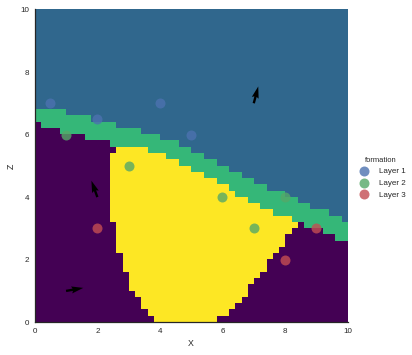

In [17]:
GeMpy.plot_section(geo_data, 32,  block = sol[1,0,:], direction='y', plot_data = True)

In [11]:
plt.contour?

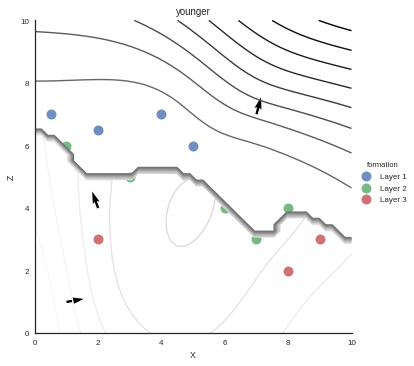

In [16]:
GeMpy.plot_potential_field(geo_data, sol[1,1,:].reshape(50, 50, 50), 22)

In [13]:
# If you change the values here. Here changes the plot as well
geo_data.foliations.set_value(0, 'dip', 40)

,G_x,G_y,G_z,X,Y,Z,azimuth,dip,formation,labels,order_series,polarity,series
0,0.258819,1.584810e-17,0.965926,7.0,4.0,7.0,90.0,40.0,Layer 1,"${\bf{x}}_{\beta \,{0}}$",1,1.0,younger
1,-0.342020,-2.094269e-17,0.939693,2.0,4.0,4.0,90.0,340.0,Layer 2,"${\bf{x}}_{\beta \,{1}}$",1,1.0,younger
0,0.984808,6.030208e-17,0.173648,1.0,4.0,1.0,90.0,40.0,Layer 3,"${\bf{x}}_{\beta \,{2}}$",2,1.0,older


In [14]:
# You need to set the interpolator again
new_series = GeMpy.select_series(geo_data, ['younger'])
data_interp = GeMpy.set_interpolator(new_series, verbose= ['cov_function'])


In [15]:
# If you change it here is not necesary. Maybe some function in GeMpy with an attribute to choose would be good
data_interp.interpolator._data_scaled.foliations.set_value(0, 'dip', 40)
# In any case, data prep has to be called to convert the data to pure arrays. This function should be hidden I guess
input_data_P = data_interp.interpolator.data_prep()

In [16]:
sol = debugging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

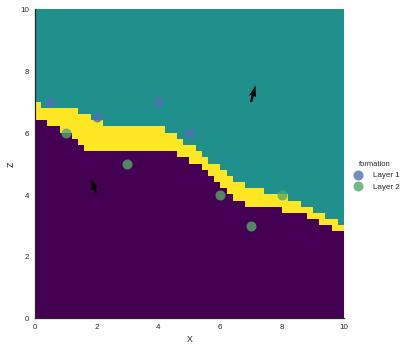

In [22]:
GeMpy.plot_section(new_series, 13,block= sol, plot_data = True)

## PyMC3

In [13]:
data_interp = GeMpy.set_interpolator(geo_data, u_grade = 0)

# This are the shared parameters and the compilation of the function. This will be hidden as well at some point
input_data_T = data_interp.interpolator.tg.input_parameters_list()
# This prepares the user data to the theano function
input_data_P = data_interp.interpolator.data_prep() 

In [14]:
# We create the op. Because is an op we cannot call it with python variables anymore. Thats why we have to make them shared
# Before
op2 = theano.OpFromGraph(input_data_T, [data_interp.interpolator.tg.whole_block_model()], on_unused_input='ignore')

In [15]:
import pymc3 as pm
theano.config.compute_test_value = 'ignore'
model = pm.Model()
with model:
    # Stochastic value
    foliation = pm.Normal('foliation', 40, sd=10)
    
    # We convert a python variable to theano.shared
    dips = theano.shared(input_data_P[1])
    
    # We add the stochastic value to the correspondant array
    dips = T.set_subtensor(dips[0], foliation)

    geo_model = pm.Deterministic('GeMpy', op2(theano.shared(input_data_P[0]), dips, 
                                     theano.shared(input_data_P[2]), theano.shared(input_data_P[3]),
                                     theano.shared(input_data_P[4]), theano.shared(input_data_P[5])))

    trace = pm.sample(6)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -0.012037: 100%|██████████| 200000/200000 [00:07<00:00, 25793.75it/s] 
Finished [100%]: Average ELBO = -0.0012071
100%|██████████| 6/6 [00:00<00:00, 18.53it/s]


In [16]:
trace.varnames, trace.get_values("GeMpy")

(['foliation', 'GeMpy'], array([[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]]))

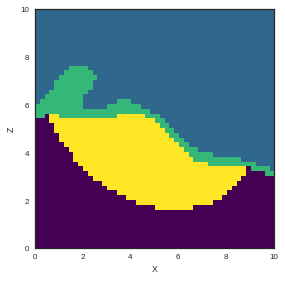

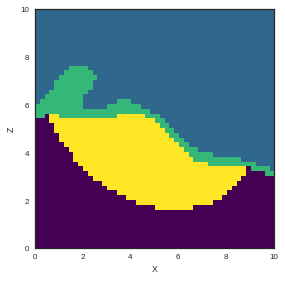

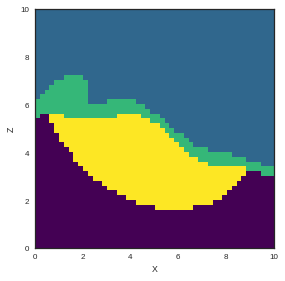

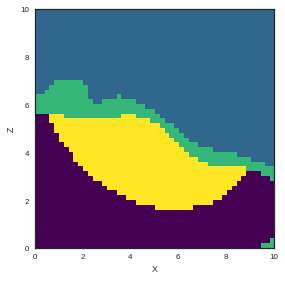

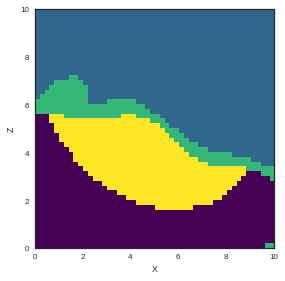

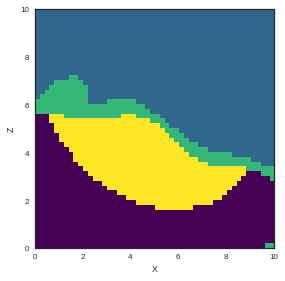

In [22]:
for i in trace.get_values('GeMpy'):
    GeMpy.plot_section(new_series, 13, block = i, plot_data = False)
    plt.show()

In [24]:
import ipyvolume.pylab as p3
import ipyvolume.serialize
ipyvolume.serialize.performance = 1 # 1 for binary, 0 for JSON
#p3 = ipyvolume.pylab.figure(width=200,height=600)

In [56]:
lith0 = trace['GeMpy'][0] == 0
lith1 = trace['GeMpy'][0] == 1
lith2 = trace['GeMpy'][0] == 2
lith3 = trace['GeMpy'][0] == 3
p3.figure(width=800)

p3.scatter(geo_data.grid.grid[:,0][lith0],
           geo_data.grid.grid[:,1][lith0],
           geo_data.grid.grid[:,2][lith0], marker='box', color = 'blue' )

p3.scatter(geo_data.grid.grid[:,0][lith1],
           geo_data.grid.grid[:,1][lith1],
           geo_data.grid.grid[:,2][lith1], marker='box', color = 'yellow', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith2],
           geo_data.grid.grid[:,1][lith2],
           geo_data.grid.grid[:,2][lith2], marker='box', color = 'green' )

p3.scatter(geo_data.grid.grid[:,0][lith3],
           geo_data.grid.grid[:,1][lith3],
           geo_data.grid.grid[:,2][lith3], marker='box', color = 'red' )

p3.show()

## Cholesky  (Under development)

In [18]:
# Cholesky solution
L = np.linalg.cholesky(C)
U = sc.linalg.cholesky(C)
Y = sc.linalg.solve_triangular(L,b, lower=True)
x = sc.linalg.solve_triangular(L.conj().T, Y)

NameError: name 'C' is not defined

In [ ]:
import scipy as sc
Y = sc.linalg.solve_triangular?

In [ ]:
debugging.profile.summary()

In [ ]:
data_interp.interpolator.tg.dips_position_all.set_value(input_data_P[0])
data_interp.interpolator.tg.dip_angles_all.set_value(input_data_P[1])
data_interp.interpolator.tg.azimuth_all.set_value(input_data_P[2])
data_interp.interpolator.tg.polarity_all.set_value(input_data_P[3])
data_interp.interpolator.tg.ref_layer_points_all.set_value(input_data_P[4])
data_interp.interpolator.tg.rest_layer_points_all.set_value(input_data_P[5])